## Formatter texte

In [1]:
import json
import pandas as pd

with open('../subset/subset.json') as f:
    data = json.load(f)

In [2]:
def get_docs_from_id(id):
    docs = []
    for o in data:
        if o['document_type_id'] == id:
            docs.append(o)
    return docs

datas = get_docs_from_id(8)

## De base

In [17]:
doc = datas[50]

keys = list(doc.keys())
keys.pop()
keys.pop()
for key in keys:
    lines = doc[key]
    for line in lines:
        text = ''
        words = line['line']['words']
        for w in words:
            text += w['text'] + ' '
        print(text)


Laboratoire de Biologie Médicale 
LBM BELLEVILLE-PYRENEES 
Cerballiance 
383 rue des Pyrenees 
75020 PARIS 
Tél : 01.46.36.17.02 - Fax : 01.46.36.77.65 
DR ROZE MATHILDE 
CABINET MEDICAL IPSO ST MARTIN 
323 RUE SAINT MARTIN 
75003 PARIS 
Madame Fouquet MAY LINE 
rue de Regnier 
75019 PARIS 
Né(e) Fouquet le 02/07/2002 
Sexe : Féminin age : 19 Ans 
Demande n° 07/12/21-HD-0047 -IPSOS- 
-TP 
Edité le mercredi 8 décembre 2021 à 08:15 
Prélevé le 07/12/21 à 09H38 
Anticorps irréguliers connus : 
Prescrit par : DR ROZE MATHILDE 
Compte rendu d'analyses transmis par voie télématique 
Immunohématologie 
Valeurs de référence 
Antériorités 
Détermination du groupe sanguin 
Groupe ABO RH 
O Positif 
Détermination des phénotypes Rh Kell 
Phénotype rhésus 
D+C+E-c+e+ 
RH : 1,2,-3,4,5 
Phénotype Kell 
Négatif 
Immunofiltration sur gel-Erytra-Grifols-St Denis 
Recherche d'anticorps irréguliers (RAI) : 
Immunofiltration sur gel-Grifols-St Denis 
La composition antigéniques des panels est conforme à la

In [4]:
def abs(a, b):
    r = a - b
    if r < 0:
        return -r
    return r

print(abs(0.385, 0.382) < 0.1)

True


In [20]:
def regrouper_mots_par_hauteur(doc, tolerance):
    mots_regroupes = []
    
    keys = list(doc.keys())
    keys.pop()
    keys.pop()
    for key in keys:
        page = {}
        lines = doc[key]
        for line in lines:
            for w in line['line']['words']:
                hauteur = w['top']
                found = False
                for h in page:
                    if abs(h, hauteur) <= tolerance:
                        found = True
                        page[h].append(w['text'])
                        break
                if found == True:
                    continue
                if hauteur not in page:
                    page[hauteur] = []
                page[hauteur].append(w['text'])
        mots_regroupes.append(page)
    return mots_regroupes

tolerance = 0.02
docs = []

for doc in datas:
    resultat = regrouper_mots_par_hauteur(doc, tolerance)
    docs.append(resultat)


# Afficher les groupes de mots
doc = docs[50]
for page in doc:
    print("@@@@@@@@@@@@@@@@")
    for hauteur, mots in page.items():
        print(mots)
        


@@@@@@@@@@@@@@@@
['Laboratoire', 'de', 'Biologie', 'Médicale', 'LBM', 'BELLEVILLE-PYRENEES']
['Cerballiance', '383', 'rue', 'des', 'Pyrenees', '75020', 'PARIS']
['Tél', ':', '01.46.36.17.02', '-', 'Fax', ':', '01.46.36.77.65']
['DR', 'ROZE', 'MATHILDE', 'CABINET', 'MEDICAL', 'IPSO', 'ST', 'MARTIN']
['323', 'RUE', 'SAINT', 'MARTIN', '75003', 'PARIS']
['Madame', 'Fouquet', 'MAY', 'LINE', 'rue', 'de', 'Regnier']
['75019', 'PARIS', 'Né(e)', 'Fouquet', 'le', '02/07/2002']
['Sexe', ':', 'Féminin', 'age', ':', '19', 'Ans', 'Demande', 'n°', '07/12/21-HD-0047', '-IPSOS-', '-TP', 'Edité', 'le', 'mercredi', '8', 'décembre', '2021', 'à', '08:15']
['Prélevé', 'le', '07/12/21', 'à', '09H38', 'Anticorps', 'irréguliers', 'connus', ':']
['Prescrit', 'par', ':', 'DR', 'ROZE', 'MATHILDE', 'Compte', 'rendu', "d'analyses", 'transmis', 'par', 'voie', 'télématique']
['Immunohématologie']
['Valeurs', 'de', 'référence', 'Antériorités']
['Détermination', 'du', 'groupe', 'sanguin']
['Groupe', 'ABO', 'RH', 'O', '

lieu 0.1522073894739151 Leduc 0.13511599600315094
Prénom 0.1662253588438034 Maryse 0.15754753351211548

## Visualisation graphique

In [10]:
import json
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt

def get_font_size(text, font_path, desired_width):
    min_size, max_size = 7, 40  # reasonable range for fontsize
    while max_size - min_size > 1:
        font_size = (min_size + max_size) // 2
        font = ImageFont.truetype(font_path, font_size)
        if font.getsize(text)[0] > desired_width:
            max_size = font_size
        else:
            min_size = font_size
    return ImageFont.truetype(font_path, min_size)

/tmp/ipykernel_6032/689991605.py:10: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(text)[0] > desired_width:


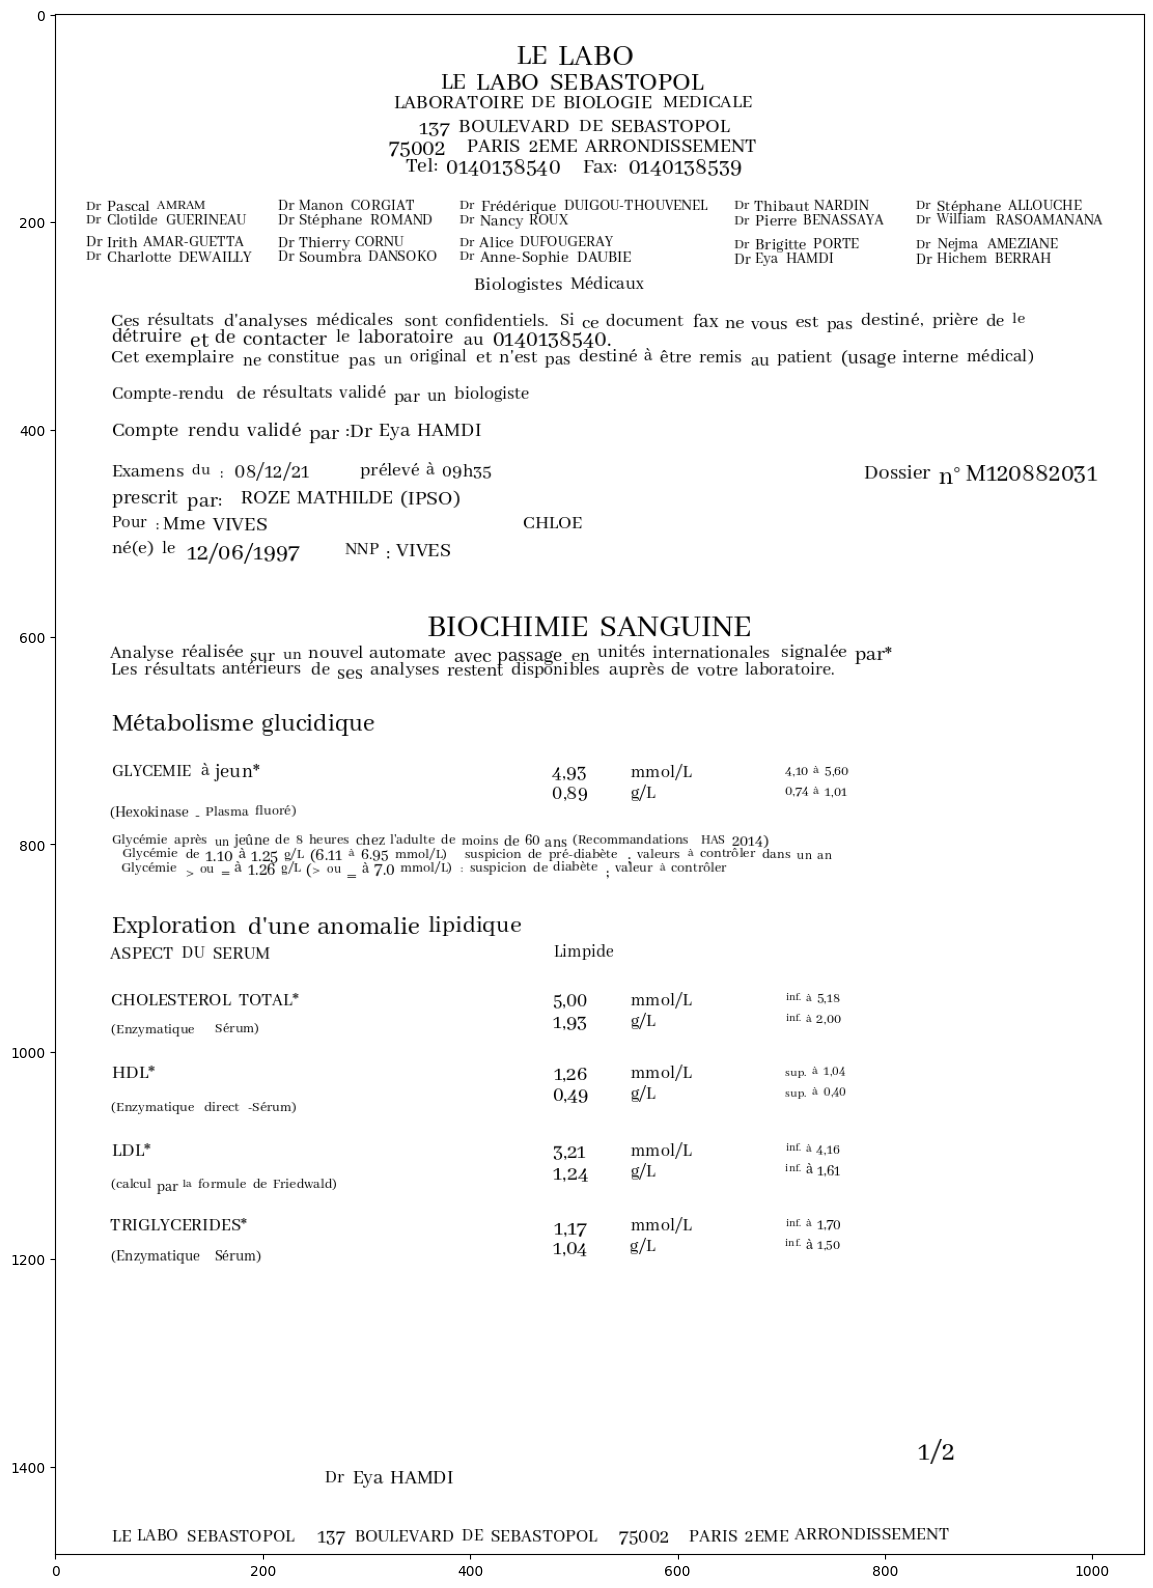

In [21]:
page_0 = datas[50]['2']
width, height = 210 *5, 297*5

####
# put the following code in an other cell to not reload full dataset each time
####
# path of .ttf
font_path = "../AbhayaLibre-Regular.ttf"


# create a new image with white background
blank_image = Image.new('RGB', (width, height), 'white')
# get a drawing context
d = ImageDraw.Draw(blank_image)
for line in page_0:
    if line['line']['confidence'] > 50:
        for word in line['line']['words']:
            (x, y, w, h) = (word['left']*width, word['top']*height, word['width']*width, word['height']*height)
            text = word["text"]
            d.text((x, y), text, font=get_font_size(text, font_path, w), fill=(0, 0, 0))

# can locally save the page with following line:
# blank_image.save("output_image.png")
plt.figure(figsize=(40,20))
plt.imshow(blank_image)
plt.savefig('test.png')